In [85]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("titanic.csv")

In [4]:
df = df1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

# Data Cleaning

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [27]:
df.drop(['Cabin'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
df = df.drop('Cabin', axis=1, inplace=True)

In [36]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [50]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [51]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# LabelEncoding

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df:
    df[i] = le.fit_transform(df[i])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0,2,108,1,28,1,0,523,18,2
1,1,1,0,190,0,51,1,0,596,207,0
2,2,1,2,353,0,34,0,0,669,41,2
3,3,1,0,272,0,47,1,0,49,189,2
4,4,0,2,15,1,47,0,0,472,43,2
...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,1,548,1,35,0,0,101,85,2
887,887,1,0,303,0,24,0,0,14,153,2
888,888,0,2,413,0,36,1,2,675,131,2
889,889,1,0,81,1,34,0,0,8,153,0


In [60]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

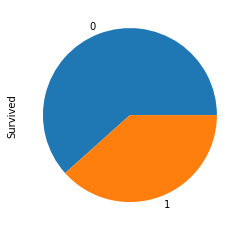

In [59]:
df['Survived'].value_counts(normalize = True).plot.pie()

# Feature Extraction

<AxesSubplot:ylabel='Age'>

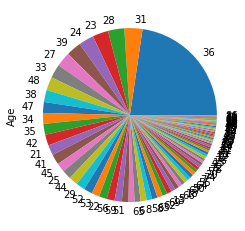

In [62]:
df["Age"].value_counts(normalize = True).plot.pie()

In [117]:
Teenagers = df[df["Age"] < 20]
Young = df[(df["Age"] >= 20) & (df["Age"] < 30)]
Adult = df[(df["Age"] >= 30) & (df["Age"] < 50)]
Old = df[df["Age"] >= 50]

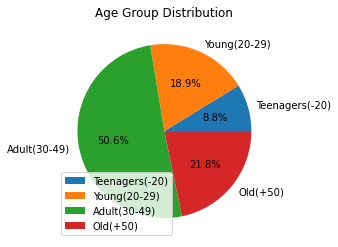

In [120]:
value_counts = pd.DataFrame({
    "Age Group": ["Teenagers(-20)", "Young(20-29)", "Adult(30-49)", "Old(+50)"],
    "Count": [Teenagers.shape[0], Young.shape[0], Adult.shape[0], Old.shape[0]]
})

# Plot pie chart
value_counts.plot(kind="pie", y="Count", labels=value_counts["Age Group"], autopct='%1.1f%%')
plt.title("Age Group Distribution")
plt.ylabel("")
plt.show()

In [132]:
from sklearn.model_selection import train_test_split
from sklearn import svm

In [167]:
y = df['Survived']
X = df.drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

clf = svm.SVC(kernel='linear')
clf.fit(X, y) #train
clf.fit(X, y) #evaluaion

Train set: (712, 10)
Test set: (179, 10)


SVC()

In [168]:
y_test.value_counts()

0    110
1     69
Name: Survived, dtype: int64

In [169]:
y_pred = clf.predict(X_test) #predict
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[103   7]
 [ 49  20]]


In [170]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6871508379888268
